In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:\\Users\\shinigami\\Datasets\\winequality-red.csv')
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.size

19188

In [8]:
df = df.drop_duplicates()
df.size

16308

<Axes: xlabel='quality'>

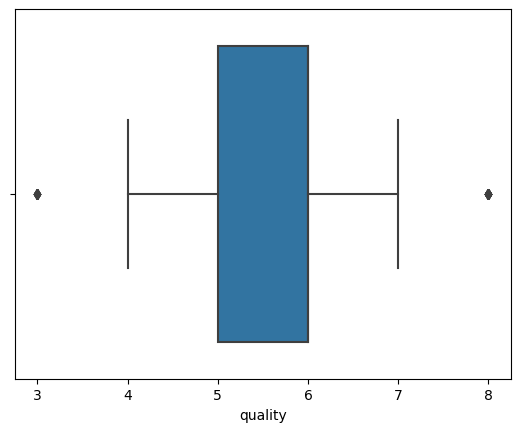

In [9]:
sns.boxplot(data = df, x = df['quality'])

In [10]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
df_with_3_and_8 = df.copy()
df_without = df.copy()

In [13]:
df_without['quality'] = df['quality'].replace(3, 4)
df_without['quality'] = df['quality'].replace(8, 7)

In [14]:
df_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(df_without.drop('quality', axis = 1), df_without['quality'], test_size = 0.2)

clf = RandomForestClassifier(max_depth = 2, criterion = 'gini')
parameters = {'max_depth': range(2, 10), 'min_samples_split': range(2, 10)}
gsv = GridSearchCV(clf, parameters)
gsv.fit(x_train, y_train)
gsv.score(x_test, y_test)

0.6102941176470589

In [16]:
print(gsv.best_estimator_, '\n', gsv.best_params_)

RandomForestClassifier(max_depth=9, min_samples_split=8) 
 {'max_depth': 9, 'min_samples_split': 8}


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df_with_3_and_8.drop('quality', axis = 1), df_with_3_and_8['quality'], test_size = 0.2)

clf1 = RandomForestClassifier(max_depth = 2, criterion = 'gini')
parameters1 = {'max_depth': range(2, 10), 'min_samples_split': range(2, 10)}
gsv1 = GridSearchCV(clf1, parameters1)
gsv1.fit(x_train, y_train)
gsv1.score(x_test, y_test)

0.5772058823529411

In [18]:
print(gsv1.best_estimator_, '\n', gsv1.best_params_)

RandomForestClassifier(max_depth=9, min_samples_split=9) 
 {'max_depth': 9, 'min_samples_split': 9}


<Axes: >

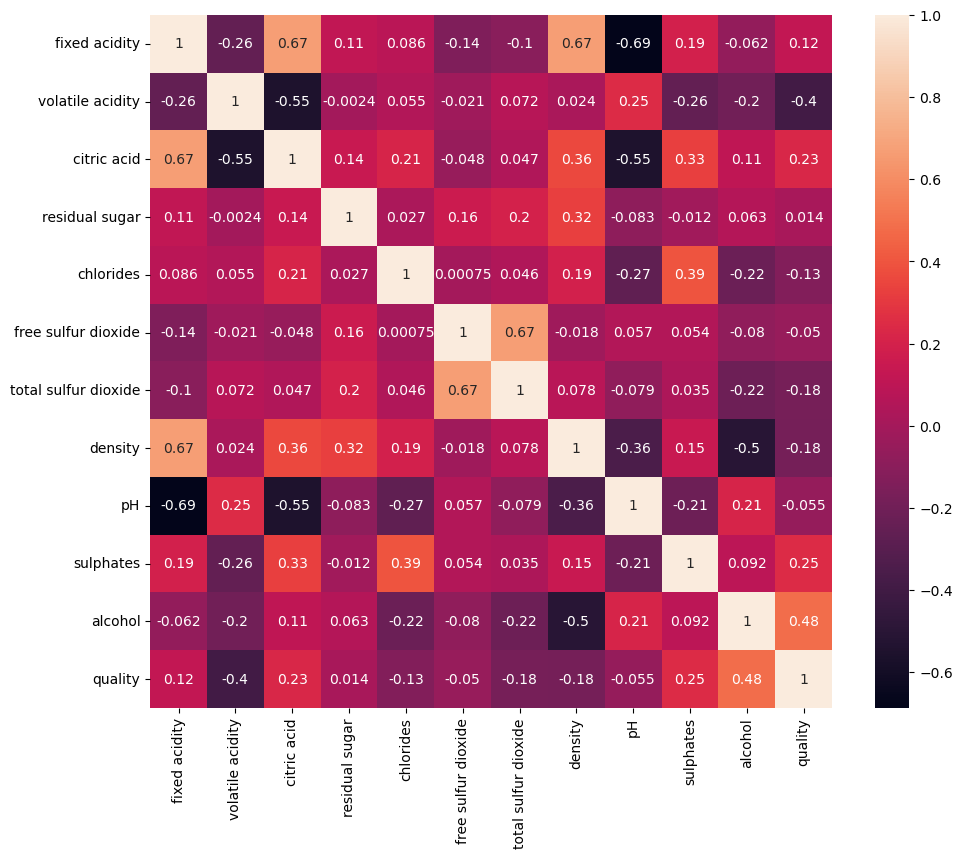

In [19]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot = True)

In [20]:
df_without_drop_col = df_without.drop(axis = 1, columns = ['volatile acidity', 'total sulfur dioxide', 'density'])

In [21]:
df_without_drop_col

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,3.16,0.58,9.8,6
5,7.4,0.00,1.8,0.075,13.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1593,6.8,0.08,1.9,0.068,28.0,3.42,0.82,9.5,6
1594,6.2,0.08,2.0,0.090,32.0,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,3.52,0.76,11.2,6
1597,5.9,0.12,2.0,0.075,32.0,3.57,0.71,10.2,5


In [41]:
df_without_drop_col['quality'] = df_without_drop_col['quality'].apply(lambda x: x-2)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_without_drop_col.drop('quality', axis = 1), df_without_drop_col['quality'], test_size = 0.2)

clf2 = RandomForestClassifier(max_depth = 2, criterion = 'gini')
parameters2 = {'max_depth': range(2, 10), 'min_samples_split': range(2, 10)}
gsv2 = GridSearchCV(clf2, parameters2)
gsv2.fit(x_train, y_train)
gsv2.score(x_test, y_test)

0.6139705882352942

In [23]:
print(gsv2.best_estimator_, end = '\n')
print(gsv2.best_params_)

RandomForestClassifier(max_depth=6, min_samples_split=3)
{'max_depth': 6, 'min_samples_split': 3}


Нейронка

In [25]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten

In [26]:
(x, x_t), (y, y_t) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [27]:
y[0].shape

(28, 28)

In [49]:
model = keras.Sequential([
    Flatten(input_shape = (11, 1)),
    Dense(100, activation = 'relu'),
    Dense(7, activation = 'softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 7)                 707       
                                                                 
Total params: 1907 (7.45 KB)
Trainable params: 1907 (7.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [43]:
df['quality'] = df['quality'].apply(lambda x: x-2)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('quality', axis = 1), df['quality'], test_size = 0.2)

In [45]:
X_train = np.array([list(X_train.loc[index]) for index, row in X_train.iterrows()])
Y_train = np.array([[i] for i in Y_train])
X_test = np.array([list(X_test.loc[index]) for index, row in X_test.iterrows()])
Y_test = np.array([[i] for i in Y_test]) 

In [46]:
X_train = np.array([i.reshape(11, 1) for i in X_train])
X_test = np.array([i.reshape(11, 1) for i in X_test])

In [47]:
Y_train_cat = keras.utils.to_categorical(Y_train)
Y_test_cat = keras.utils.to_categorical(Y_test)

In [48]:
Y_train_cat[0].shape

(7,)

In [50]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
model.fit(X_train, Y_train_cat, epochs = 100, validation_split = 0.15)

Epoch 1/100
29/29 [==============================] - 1s 11ms/step - loss: 2.4908 - accuracy: 0.3304 - val_loss: 1.5407 - val_accuracy: 0.4207
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1.2674 - accuracy: 0.4713 - val_loss: 1.3371 - val_accuracy: 0.4817
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 1.2169 - accuracy: 0.4713 - val_loss: 1.3568 - val_accuracy: 0.4573
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 1.2025 - accuracy: 0.4572 - val_loss: 1.2789 - val_accuracy: 0.5061
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 1.1748 - accuracy: 0.4789 - val_loss: 1.2739 - val_accuracy: 0.4695
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 1.1589 - accuracy: 0.4919 - val_loss: 1.2412 - val_accuracy: 0.5122
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 1.1693 - accuracy: 0.4789 - val_loss: 1.2423 - val_accuracy: 0.5000
Epoch 8/100


In [52]:
model.evaluate(X_test, Y_test_cat)

9/9 [==============================] - 0s 2ms/step - loss: 1.0597 - accuracy: 0.5735


[1.059660792350769, 0.5735294222831726]

Нейронка с удаленными выбросами

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model1 = keras.Sequential([
    Flatten(input_shape = (11, 1)),
    Dense(100, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

print(model1.summary())

In [ ]:
df_without['quality'] = df_without['quality'].apply(lambda x: x-2)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_without.drop('quality', axis = 1), df_without['quality'], test_size = 0.2)

In [ ]:
X_train = np.array([list(X_train.loc[index]) for index, row in X_train.iterrows()])
Y_train = np.array([[i] for i in Y_train])
X_test = np.array([list(X_test.loc[index]) for index, row in X_test.iterrows()])
Y_test = np.array([[i] for i in Y_test])

In [ ]:
X_train = np.array([i.reshape(11, 1) for i in X_train])
X_test = np.array([i.reshape(11, 1) for i in X_test])

In [ ]:
Y_train_cat = keras.utils.to_categorical(Y_train)
Y_test_cat = keras.utils.to_categorical(Y_test)

In [ ]:
Y_train_cat = np.array([i.reshape(4, 1) for i in Y_train_cat])
Y_test_cat = np.array([i.reshape(4, 1) for i in Y_test_cat])

In [ ]:
model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model1.fit(X_train, Y_train_cat, epochs = 60, validation_split = 0.15)

In [ ]:
model1.evaluate(X_test, Y_test_cat)